In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, matthews_corrcoef
from xgboost import XGBClassifier
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE
import seaborn as sns

# I. Phân tích dữ liệu

In [124]:
import gdown

# Read the data into DataFrame
data = pd.read_csv('english_learning_dataset.csv')

# Display the first few rows of
data.head()

,Student ID,Age,Gender,Major,Year of Study,TOEFL Score,IELTS Score,Previous English Grade,Learning Style,Learning Mode,Learning Pace,Learning Time,Material Type,Hours/Week,Participation,Quiz Score,Engagement Level,Competency Level,Final Grade
0,ID_253,20.0,M,Literature,Senior,62.0,5.6,C,Reading/Writing,Hybrid,Slow,Afternoon,Interactive,11.0,Medium,66.0,Medium,Advanced,F
1,ID_185,24.0,M,Engineering,Senior,70.0,6.1,D,Reading/Writing,Online,Slow,Morning,Audio,19.0,Low,80.0,Low,Intermediate,D
2,ID_232,18.0,M,Literature,Freshman,105.0,7.2,C,Visual,Online,Average,Evening,Interactive,18.0,Medium,67.0,Medium,Intermediate,F
3,ID_243,21.0,F,Biology,Freshman,77.0,5.6,B,Auditory,Hybrid,Slow,Evening,Audio,8.0,High,83.0,Low,Beginner,C
4,ID_22,23.0,M,Literature,Freshman,74.0,6.8,F,Reading/Writing,Online,Fast,Evening,Audio,19.0,Low,67.0,High,Advanced,C


In [125]:
# CHECK SPECIAL CASE

#check null
data.dropna(inplace= True)

#check and drop duplicates
data.drop_duplicates(inplace= True)
print(len(data))

#check missing value
print(data.isnull().sum())

990
Student ID                0
Age                       0
Gender                    0
Major                     0
Year of Study             0
TOEFL Score               0
IELTS Score               0
Previous English Grade    0
Learning Style            0
Learning Mode             0
Learning Pace             0
Learning Time             0
Material Type             0
Hours/Week                0
Participation             0
Quiz Score                0
Engagement Level          0
Competency Level          0
Final Grade               0
dtype: int64


## 1) Phân phối học sinh theo nhóm final grade


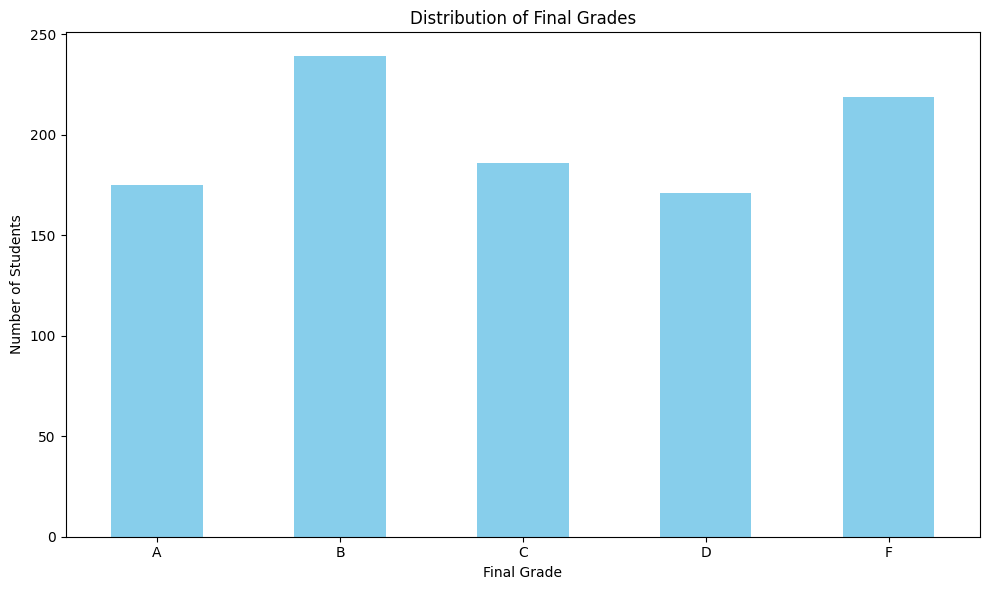

In [126]:
# prompt: phân phối nhãn ra xem có bao nhiêu học sinh thuộc các nhóm final grade, sắp xếp thông tin chart cho dễ đọc

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' DataFrame is already loaded as in the previous code

# Count the number of students in each final grade group
grade_counts = data['Final Grade'].value_counts().sort_index()

# Create a bar chart
plt.figure(figsize=(10, 6))
grade_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Final Grades')
plt.xlabel('Final Grade')
plt.ylabel('Number of Students')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()





Kết luận :
1. Phân hóa rõ rệt: Nhiều học sinh đạt điểm B và F, trong khi C và D ít nổi bật.
2. Thiếu cân bằng: Học sinh rơi vào hai thái cực (khá giỏi và yếu), nhóm trung bình ít hơn.
3. Không quá chênh lệch: Dù B và F cao nhất, các mức điểm khác vẫn có số lượng đáng kể.








## 2) Biểu đồ so sánh feature Learning Mode và Final Grade


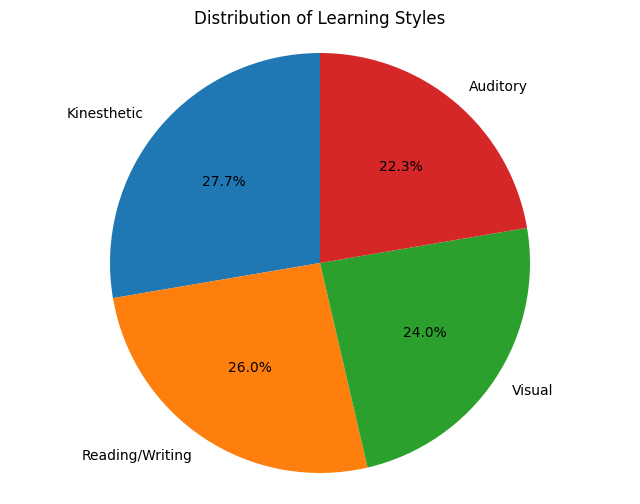

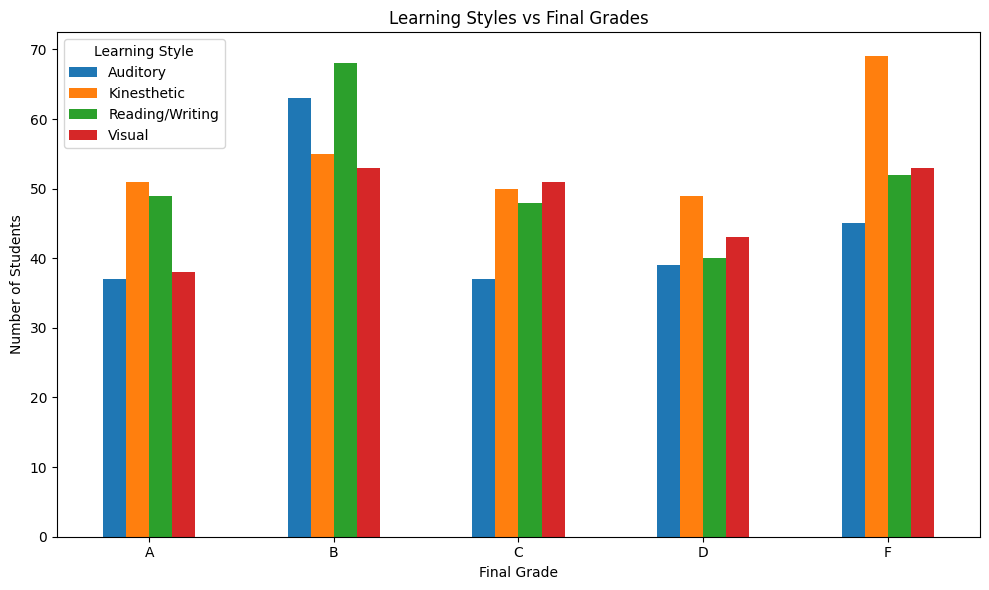

In [127]:
# prompt: tạo biểu đồ so sánh learning mode và final grade trong file english_learning_dataset.csv bằng biểu đồ pie

import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' DataFrame is already loaded as in the previous code
# If not, load it first: data = pd.read_csv('english_learning_dataset.csv')

learning_mode_counts = data['Learning Style'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(learning_mode_counts, labels=learning_mode_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Learning Styles')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# For comparing learning mode with final grade
# You can create separate pie charts for each grade or a grouped bar chart for better comparison

# Example for grouped bar chart:

final_grade_counts = data.groupby('Final Grade')['Learning Style'].value_counts().unstack(fill_value=0)
final_grade_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Learning Styles vs Final Grades')
plt.xlabel('Final Grade')
plt.ylabel('Number of Students')
plt.xticks(rotation=0)
plt.legend(title='Learning Style')
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


Kết luận:

1. Reading/Writing và Auditory đạt điểm B cao nhất, cho thấy hai nhóm này học tốt hơn.
2. Kinesthetic có xu hướng phân cực, nhiều học sinh đạt điểm D và F.
3. Visual khá đồng đều, nhưng có tỷ lệ cao ở điểm F.
4. Học sinh có phong cách học khác nhau có kết quả đa dạng, cho thấy phương pháp học ảnh hưởng đáng kể đến thành tích.

## 3) Biểu đồ so sánh feature Hours/Week và Final Grade


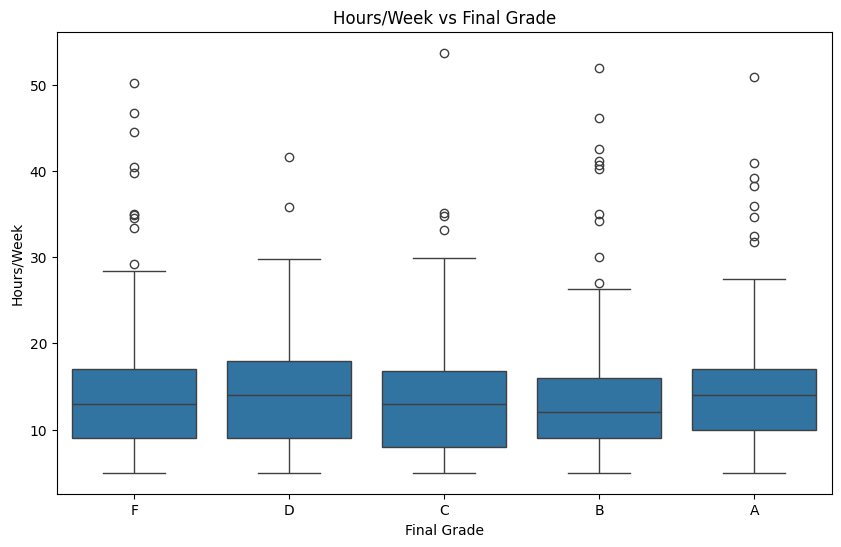

In [128]:
# prompt: tạo chart so sánh giữa Hours/Week và Final Grade, thể hiện đủ 5 loại điểm A B C D F

import pandas as pd
import matplotlib.pyplot as plt
# Assuming 'data' DataFrame is already loaded as in the previous code
# If not, load it first: data = pd.read_csv('english_learning_dataset.csv')

plt.figure(figsize=(10, 6))
sns.boxplot(x='Final Grade', y='Hours/Week', data=data, order=['F', 'D', 'C', 'B', 'A'])
plt.title('Hours/Week vs Final Grade')
plt.xlabel('Final Grade')
plt.ylabel('Hours/Week')
plt.show()


Kết luận:

1. Số giờ học mỗi tuần không có sự chênh lệch rõ ràng giữa các nhóm điểm số (A đến F có phạm vi tương tự).
2. Trung vị số giờ học ổn định quanh mức 12-13 giờ/tuần bất kể điểm số.
3. Có sự phân tán lớn trong mỗi nhóm, cho thấy có người học ít nhưng vẫn đạt điểm cao và ngược lại.
4. Học nhiều giờ không đảm bảo điểm cao, cách học có thể quan trọng hơn số giờ học.

## 4) So sánh feature Participation và Final Grade

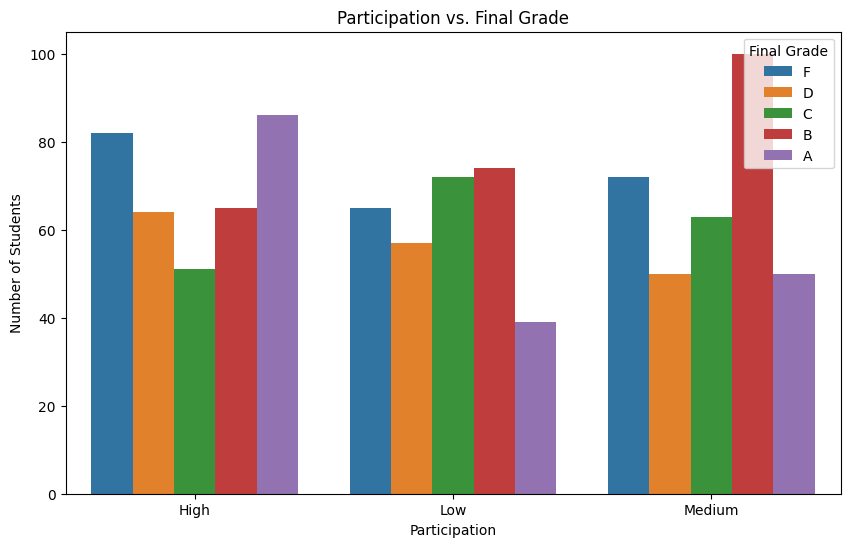

In [129]:
# prompt: Tạo biểu đồ cột biểu thi số lượng học sinh và final grade thông qua participation

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' DataFrame is already loaded as in the previous code
# If not, load it first: data = pd.read_csv('english_learning_dataset.csv')

plt.figure(figsize=(10, 6))
sns.countplot(x='Participation', hue='Final Grade', data=data, order=sorted(data['Participation'].unique()))
plt.title('Participation vs. Final Grade')
plt.xlabel('Participation')
plt.ylabel('Number of Students')
plt.show()


Dựa trên biểu đồ "Participation vs. Final Grade" (Mức độ tham gia vs. Điểm cuối khóa), ta có thể rút ra một số kết luận sau:

1. Sinh viên có mức độ tham gia cao có tỷ lệ đạt điểm A cao hơn: Nhóm có mức độ tham gia cao có số lượng sinh viên đạt điểm A khá lớn, cao hơn so với các mức tham gia khác.

2. Sinh viên có mức độ tham gia thấp có tỷ lệ điểm F cao: Nhóm tham gia thấp có số lượng sinh viên rớt (điểm F) tương đối nhiều, cho thấy có thể có mối liên hệ
giữa sự tham gia và kết quả học tập.

3. Mức độ tham gia trung bình có tỷ lệ điểm B cao nhất: Nhóm này có số lượng sinh viên đạt điểm B cao nhất so với hai nhóm còn lại.

4. Sự tham gia có thể tác động đến điểm số: Nhìn chung, nhóm có mức độ tham gia cao có xu hướng có nhiều sinh viên đạt điểm cao hơn, trong khi nhóm tham gia
thấp có nhiều sinh viên đạt điểm thấp hơn.


## 5) So sánh feature Major và Final Grade

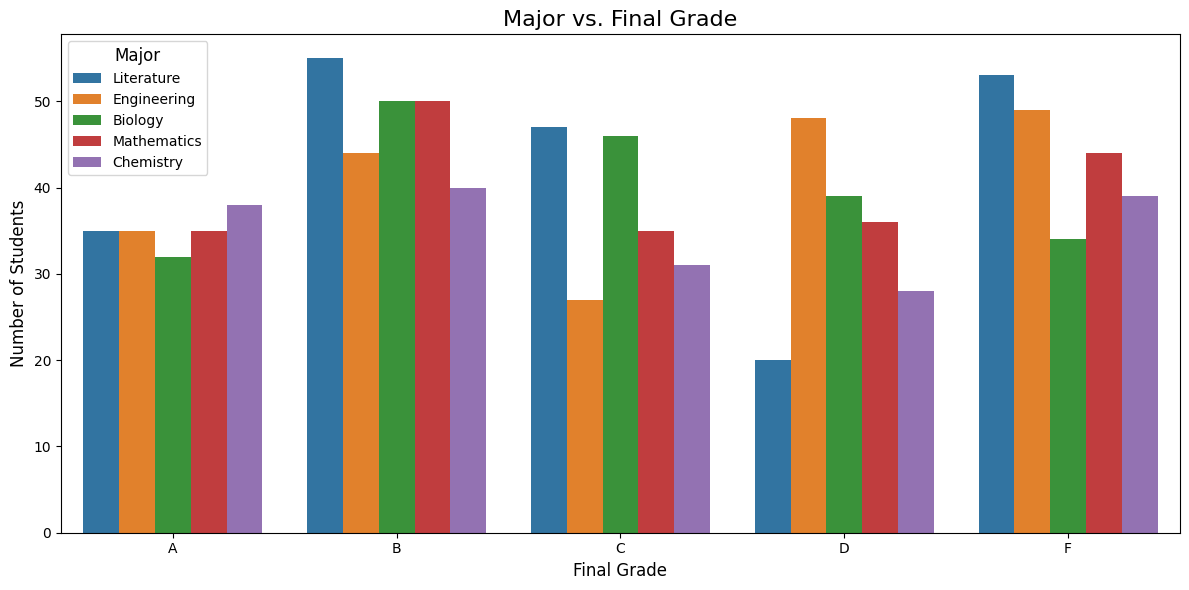

In [130]:
# prompt: Tạo biểu đồ so sánh major và final grade dễ đọc dễ nhìn chứa đầy đủ thông tin

import pandas as pd
import matplotlib.pyplot as plt
# Assuming 'data' DataFrame is already loaded as in the previous code
# If not, load it first: data = pd.read_csv('english_learning_dataset.csv')

plt.figure(figsize=(12, 6))  # Increased figure size for better readability
sns.countplot(x='Final Grade', hue='Major', data=data, order=sorted(data['Final Grade'].unique()))
plt.title('Major vs. Final Grade', fontsize=16) # Increased title font size
plt.xlabel('Final Grade', fontsize=12) # Increased x-axis label font size
plt.ylabel('Number of Students', fontsize=12)  # Increased y-axis label font size
plt.xticks(rotation=0, fontsize=10) # Increased x-axis tick label font size
plt.yticks(fontsize=10) # Increased y-axis tick label font size
plt.legend(title='Major', title_fontsize=12, fontsize=10) # Increased legend font sizes
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()


Kết luận
1. Ngành Văn học có nhiều sinh viên đạt điểm B, C, ít điểm D.
2. Ngành Kỹ thuật có tỷ lệ sinh viên đạt điểm D, F cao nhất, cho thấy độ khó cao.
3. Hóa học có ít sinh viên đạt điểm C, chủ yếu rơi vào nhóm B hoặc F.
4. Toán học và Sinh học có phân bố điểm số khá đồng đều, không có xu hướng quá lệch về một mức điểm nào.

=> Có tương quan giữa ngành học và kết quả điểm số, cho thấy mỗi ngành có độ khó khác nhau, ảnh hưởng đến phân bố điểm của sinh viên.

## 6) So sánh Learning style và Final Grade


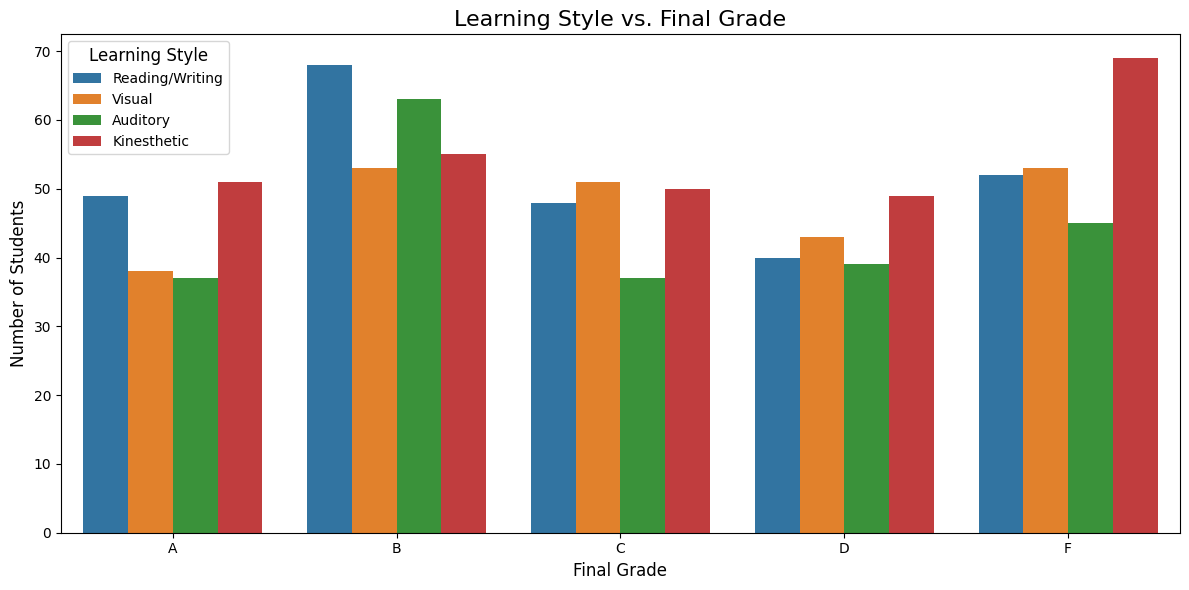

In [131]:
# prompt: Tạo biểu đồ so sánh learning style và final grade bằng biểu đồ bar chart đầy đủ thông tin

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' DataFrame is already loaded

plt.figure(figsize=(12, 6))
sns.countplot(x='Final Grade', hue='Learning Style', data=data, order=sorted(data['Final Grade'].unique()))
plt.title('Learning Style vs. Final Grade', fontsize=16)
plt.xlabel('Final Grade', fontsize=12)
plt.ylabel('Number of Students', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Learning Style', title_fontsize=12, fontsize=10)
plt.tight_layout()
plt.show()


Kết luận
1. Kiểu học đọc/viết (Reading/Writing) có tỷ lệ đạt điểm A, B cao nhất, cho thấy nhóm này có hiệu quả học tập tốt.
2. Kiểu học vận động (Kinesthetic) có nhiều sinh viên đạt điểm D, F, cho thấy phương pháp này có thể gặp khó khăn trong việc tiếp thu kiến thức truyền thống.
3. Kiểu học nghe (Auditory) có tỷ lệ đạt điểm B cao, nhưng cũng có nhiều sinh viên đạt điểm F, cho thấy sự phân hóa rõ rệt.
4. Kiểu học bằng hình ảnh (Visual) có sự phân bố khá đồng đều, nhưng tỷ lệ đạt điểm C và D vẫn cao.

=> Có tương quan giữa phong cách học tập và kết quả điểm số, trong đó nhóm học đọc/viết có xu hướng đạt kết quả tốt hơn, còn nhóm học vận động gặp nhiều khó khăn hơn.








## 7) So sánh Learning Pace và Final Grade

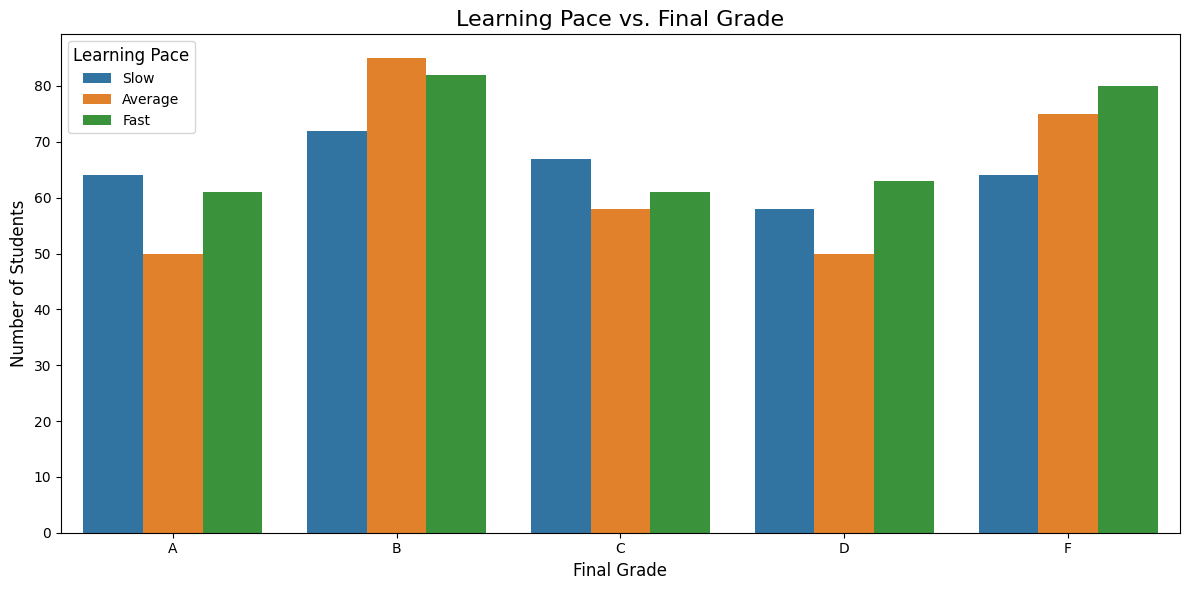

In [132]:
# prompt: Tạo biểu đồ so sánh learing pace và final grade

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
sns.countplot(x='Final Grade', hue='Learning Pace', data=data, order=sorted(data['Final Grade'].unique()))
plt.title('Learning Pace vs. Final Grade', fontsize=16)
plt.xlabel('Final Grade', fontsize=12)
plt.ylabel('Number of Students', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Learning Pace', title_fontsize=12, fontsize=10)
plt.tight_layout()
plt.show()


Kết luận
1. Nhóm học nhanh (Fast learners) có tỷ lệ đạt điểm B cao nhất, nhưng cũng có nhiều sinh viên đạt điểm F, cho thấy sự phân hóa rõ rệt.
2. Nhóm học chậm (Slow learners) có tỷ lệ khá đồng đều ở tất cả các mức điểm, nhưng có số lượng cao hơn ở A, D, F, cho thấy họ có thể gặp khó khăn trong việc duy trì điểm trung bình.
3. Nhóm học trung bình (Average learners) có sự phân bố tương đối ổn định nhưng ít sinh viên đạt điểm A và nhiều sinh viên đạt điểm F.

=> Có mối quan hệ giữa tốc độ học tập và kết quả học tập, trong đó nhóm học nhanh có xu hướng đạt điểm cao hoặc thấp rõ rệt, còn nhóm học trung bình có sự ổn định nhưng ít xuất sắc.

## 8) So sánh Learning Time và Final Grade


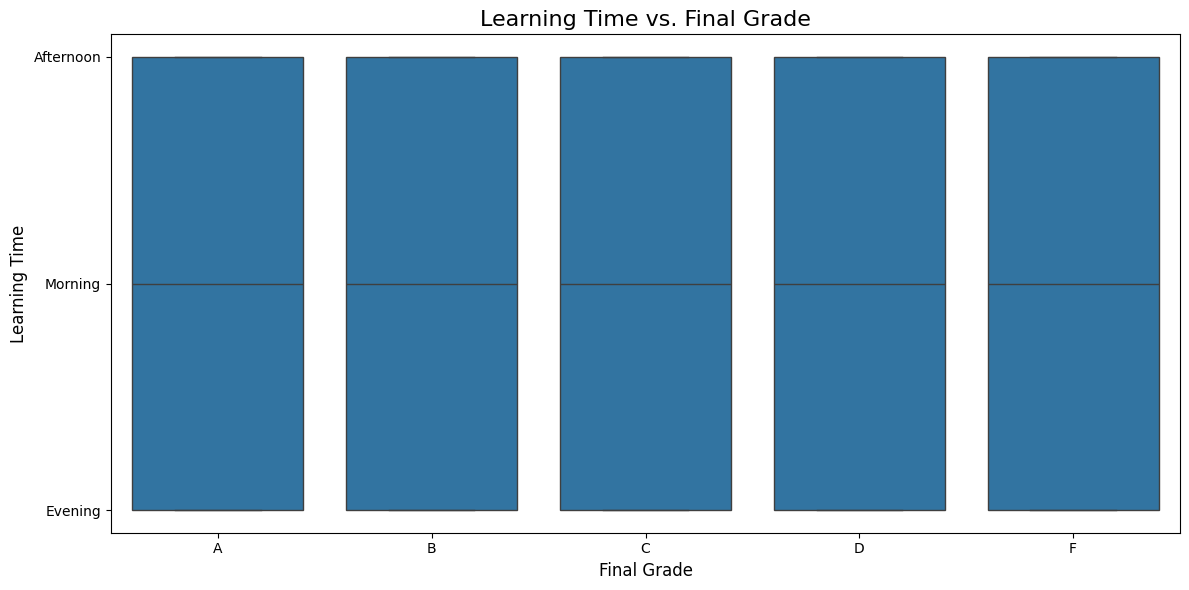

In [133]:
# prompt: Tạo biểu đồ so sánh learning time và final grade trực quan nhất

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' DataFrame is already loaded

plt.figure(figsize=(12, 6))
sns.boxplot(x='Final Grade', y='Learning Time', data=data, order=sorted(data['Final Grade'].unique()))
plt.title('Learning Time vs. Final Grade', fontsize=16)
plt.xlabel('Final Grade', fontsize=12)
plt.ylabel('Learning Time', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


Kết luận
1. Không có sự khác biệt rõ ràng giữa thời gian học (sáng, chiều, tối) và điểm số cuối cùng.
2. Các nhóm điểm (A-F) có phân bố thời gian học tương tự nhau, cho thấy thời gian học không phải yếu tố quyết định chính đến kết quả học tập.
3. Có thể chất lượng học tập quan trọng hơn thời gian học cụ thể.

## 9) So sánh Material Type và Final Grade


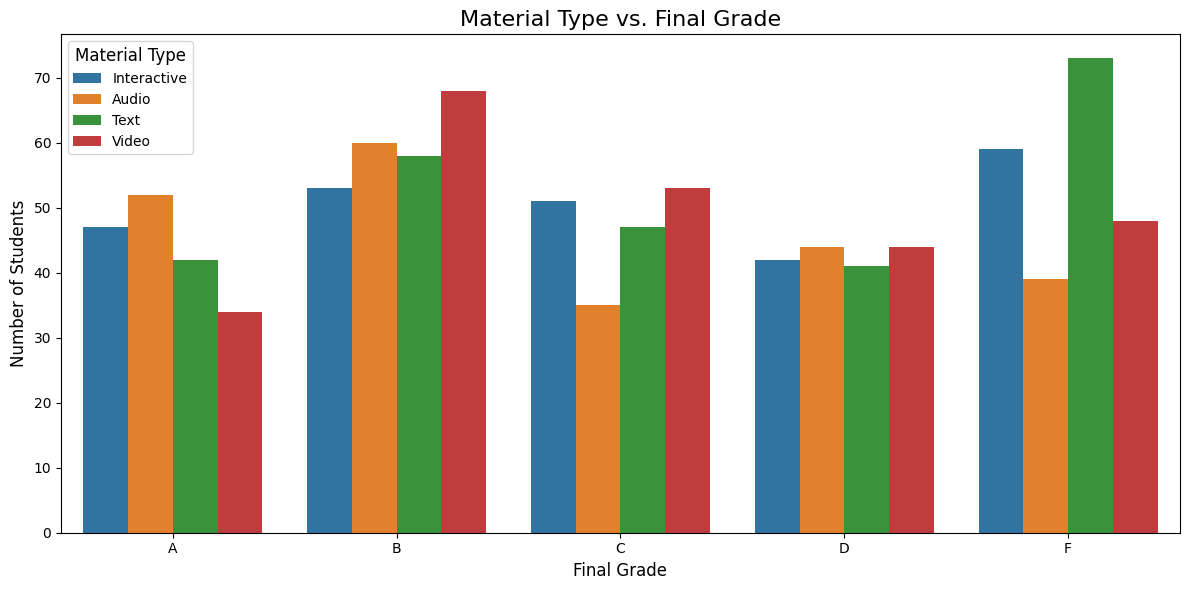

In [134]:
# prompt: tạo biểu đồ so sánh material type và final grade

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
sns.countplot(x='Final Grade', hue='Material Type', data=data, order=sorted(data['Final Grade'].unique()))
plt.title('Material Type vs. Final Grade', fontsize=16)
plt.xlabel('Final Grade', fontsize=12)
plt.ylabel('Number of Students', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Material Type', title_fontsize=12, fontsize=10)
plt.tight_layout()
plt.show()


Kết luận
1. Học liệu dạng "Video" và "Text" có số lượng sinh viên đạt điểm B cao nhất, cho thấy hai phương pháp này hỗ trợ tốt cho việc học.
2. Dạng "Interactive" có số lượng sinh viên đạt điểm F cao nhưng cũng có lượng sinh viên đạt điểm A khá cao, thể hiện mức độ ảnh hưởng có thể tùy thuộc vào cách tiếp cận.
3. Học liệu "Audio" có xu hướng ít hiệu quả hơn, khi có số lượng sinh viên đạt điểm thấp (C, D, F) khá cao.

=> Tổng thể, việc kết hợp nhiều dạng học liệu có thể tối ưu hóa hiệu suất học tập.

## 10) So sánh Quiz Score và Final Grade


<ipython-input-135-6ea9ba403ba6>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Final Grade', y='Quiz Score', data=data, ci=None, palette='viridis')
<ipython-input-135-6ea9ba403ba6>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Final Grade', y='Quiz Score', data=data, ci=None, palette='viridis')


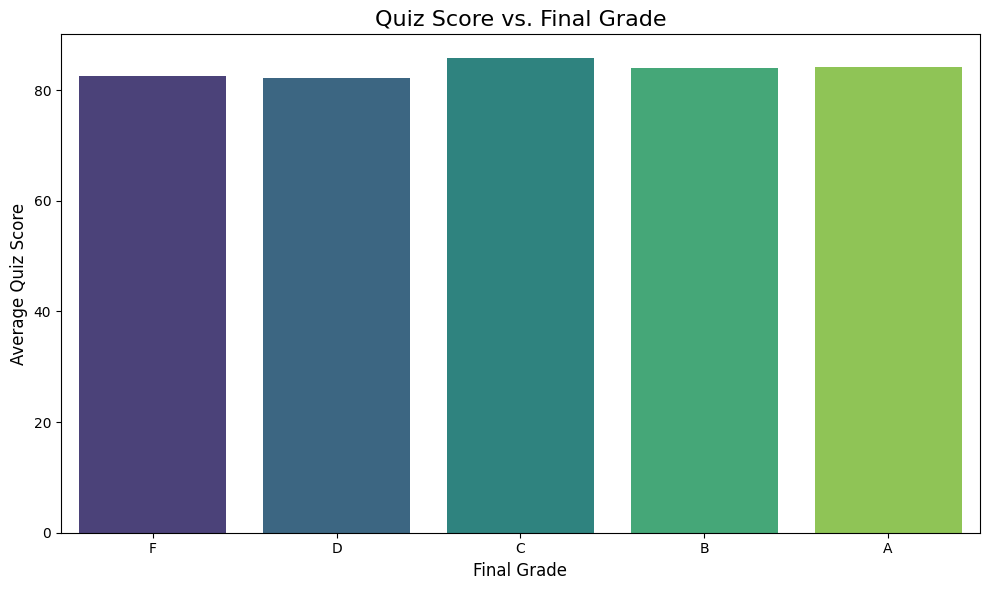

In [135]:
# prompt: Tạo biểu đồ so sánh giữa quiz score và final grade bằng bar chart, trực quan, dễ thấy sự khác biệt

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.barplot(x='Final Grade', y='Quiz Score', data=data, ci=None, palette='viridis')
plt.title('Quiz Score vs. Final Grade', fontsize=16)
plt.xlabel('Final Grade', fontsize=12)
plt.ylabel('Average Quiz Score', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


Kết luận
1. Điểm trung bình bài kiểm tra (quiz) không có sự khác biệt đáng kể giữa các nhóm điểm cuối kỳ (Final Grade).
2. Đáng chú ý, nhóm điểm F vẫn có điểm quiz trung bình cao, cho thấy bài kiểm tra ngắn hạn không phản ánh chính xác kết quả cuối cùng.
3. Điều này gợi ý rằng các yếu tố khác (ví dụ: bài tập lớn, dự án, thi cuối kỳ) có thể đóng vai trò quan trọng hơn trong việc quyết định điểm số chung cuộc.








## 11) So sánh Engagement Level và Final Grade


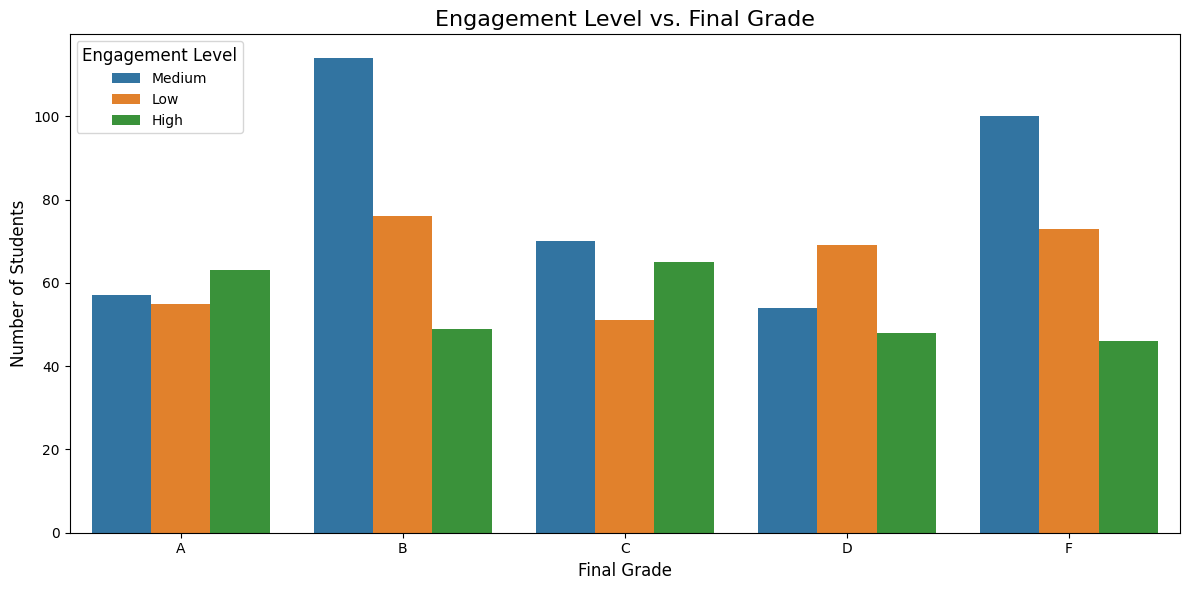

In [136]:
# prompt: so sánh engagement level và final grade theo số lượng học sinh

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
sns.countplot(x='Final Grade', hue='Engagement Level', data=data, order=sorted(data['Final Grade'].unique()))
plt.title('Engagement Level vs. Final Grade', fontsize=16)
plt.xlabel('Final Grade', fontsize=12)
plt.ylabel('Number of Students', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Engagement Level', title_fontsize=12, fontsize=10)
plt.tight_layout()
plt.show()


Kết luận
1. Học sinh có mức độ tương tác cao có xu hướng đạt điểm A nhiều hơn.
2. Những học sinh có mức độ tương tác thấp chủ yếu rơi vào nhóm điểm D và F.
3. Mức độ tương tác trung bình xuất hiện nhiều ở cả nhóm điểm B và F, cho thấy sự phân hóa rõ rệt.
4. Tương tác đóng vai trò quan trọng trong kết quả học tập, nhưng không phải là yếu tố quyết định duy nhất.




## 12) So sánh Competency Level và Final Grade


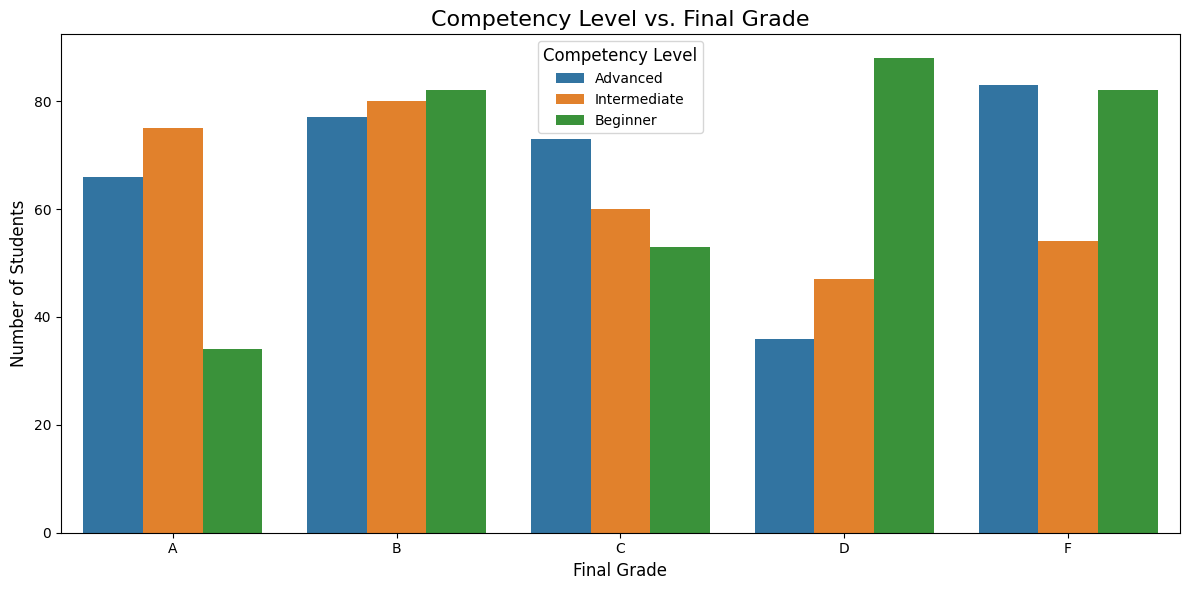

In [137]:
# prompt: Tạo biểu đồ so sánh competency level và final grade về số lượng học sinh

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' DataFrame is already loaded as in the previous code
# If not, load it first: data = pd.read_csv('english_learning_dataset.csv')

plt.figure(figsize=(12, 6))
sns.countplot(x='Final Grade', hue='Competency Level', data=data, order=sorted(data['Final Grade'].unique()))
plt.title('Competency Level vs. Final Grade', fontsize=16)
plt.xlabel('Final Grade', fontsize=12)
plt.ylabel('Number of Students', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Competency Level', title_fontsize=12, fontsize=10)
plt.tight_layout()
plt.show()


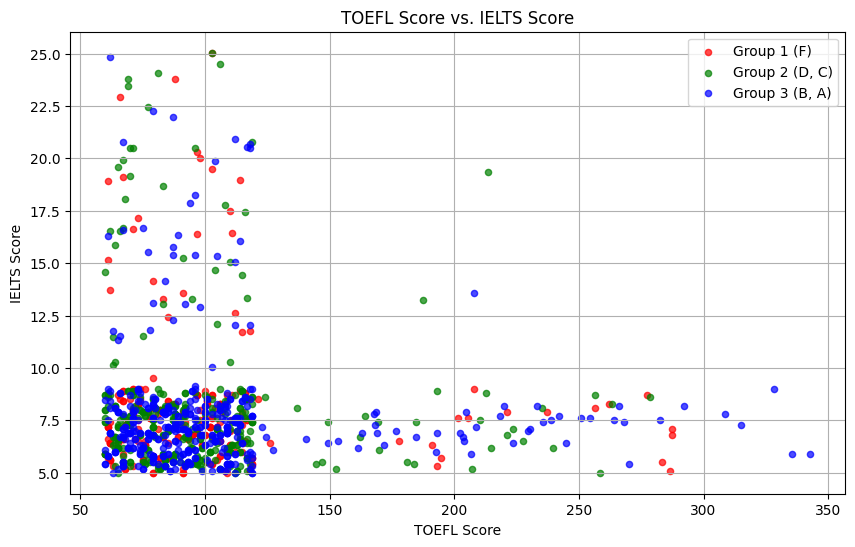

In [162]:
# prompt: # prompt: Viết code bằng Python (sử dụng matplotlib & seaborn) để tạo biểu đồ scatter plot hiển thị mối quan hệ giữa Điểm TOEFL (trục X) và Điểm IELTS (trục Y) từ dataset của tôi.
# # Phân 3 nhóm : nhóm 1: F, nhóm 2:  D và C, nhóm 3: B và A
# # Mỗi nhóm có màu sắc với các chấm siêu nhỏ
# # Độ trong suốt (alpha=0.7) để dễ quan sát điểm trùng.
# # Hiển thị cả chú thích (legend).
# # Kích thước điểm (s=80) để dễ nhìn."*

import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'data' and contains columns 'TOEFL Score' and 'IELTS Score'
# and a column 'Final Grade'

# Create a scatter plot
plt.figure(figsize=(10, 6))

# Group 1: F
group1 = data[data['Final Grade'] == 'F']
plt.scatter(group1['TOEFL Score'], group1['IELTS Score'], s=80, c='red', alpha=0.7, label='Group 1 (F)', marker='.')

# Group 2: D and C
group2 = data[data['Final Grade'].isin(['D', 'C'])]
plt.scatter(group2['TOEFL Score'], group2['IELTS Score'], s=80, c='green', alpha=0.7, label='Group 2 (D, C)', marker='.')


# Group 3: B and A
group3 = data[data['Final Grade'].isin(['B', 'A'])]
plt.scatter(group3['TOEFL Score'], group3['IELTS Score'], s=80, c='blue', alpha=0.7, label='Group 3 (B, A)', marker='.')


plt.title('TOEFL Score vs. IELTS Score')
plt.xlabel('TOEFL Score')
plt.ylabel('IELTS Score')
plt.legend()
plt.grid(True)
plt.show()


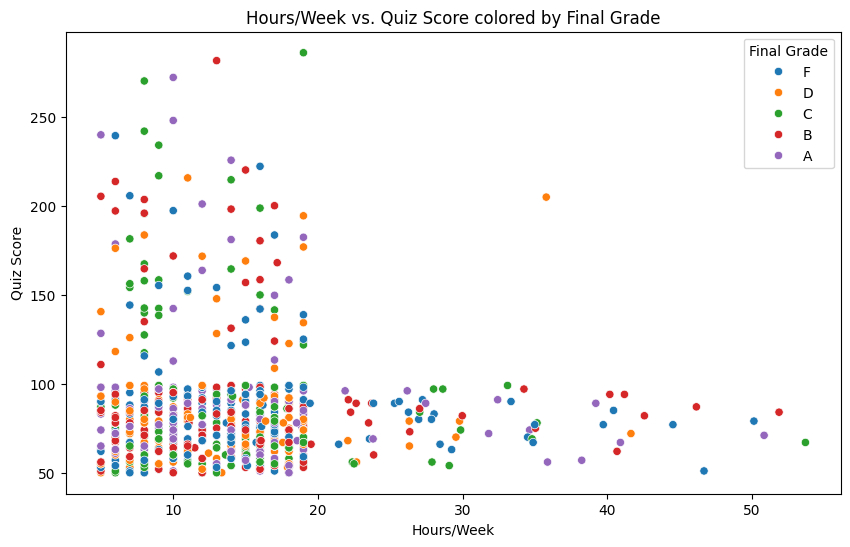

In [139]:
# prompt: Tôi muốn tạo một scatter plot để biểu thị tính tương quan (ít nhất 2 đặc điểm) với cột final grade. Bạn có thể chọn các đặc điểm đó giúp tôi dựa theo file .csv tôi đăng tải

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Hours/Week', y='Quiz Score', hue='Final Grade', data=data)
plt.title('Hours/Week vs. Quiz Score colored by Final Grade')
plt.xlabel('Hours/Week')
plt.ylabel('Quiz Score')
plt.show()


In [140]:
# Learning Mode vs Final Grade
# Participation vs Final Grade
# Major vs Final Grade
# Learning Style vs Final Grade
# Learning Pace vs Final Grade
# Material Type vs Final Grade
# Engagement Level vs Final Grade
# Competency Level vs Final Grade

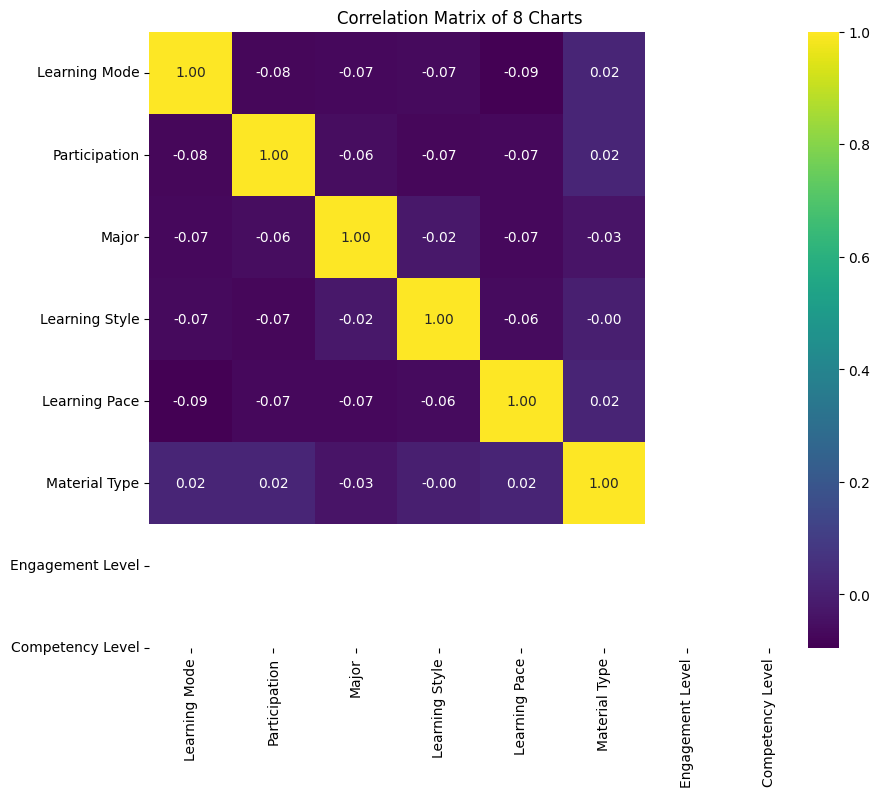

In [141]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Giả sử 'correlation_matrix' là ma trận tương quan đã được tính toán
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f",
            xticklabels=['Learning Mode', 'Participation', 'Major', 'Learning Style',
                       'Learning Pace', 'Material Type', 'Engagement Level', 'Competency Level'],
            yticklabels=['Learning Mode', 'Participation', 'Major', 'Learning Style',
                       'Learning Pace', 'Material Type', 'Engagement Level', 'Competency Level'])
plt.title('Correlation Matrix of 8 Charts')
plt.show()

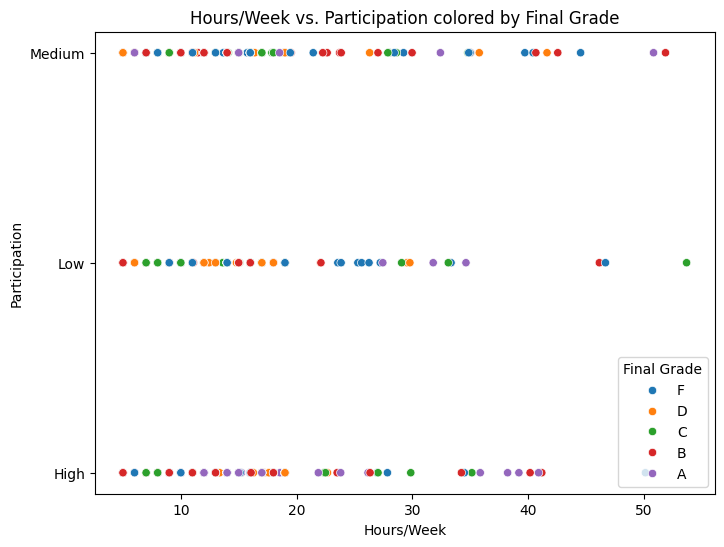

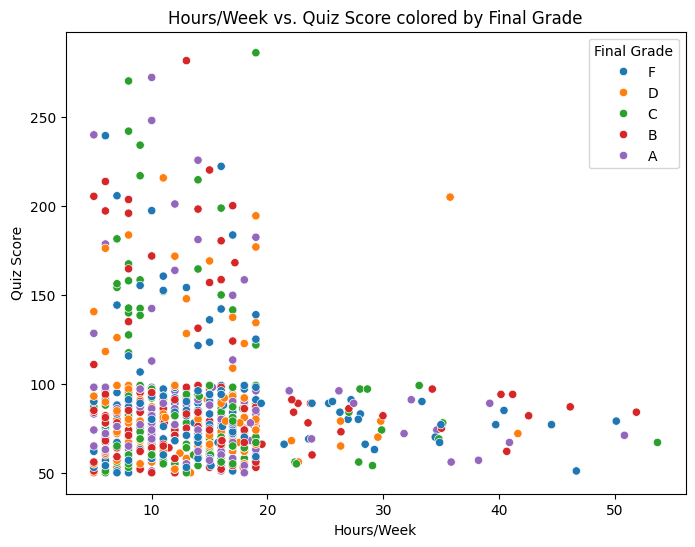

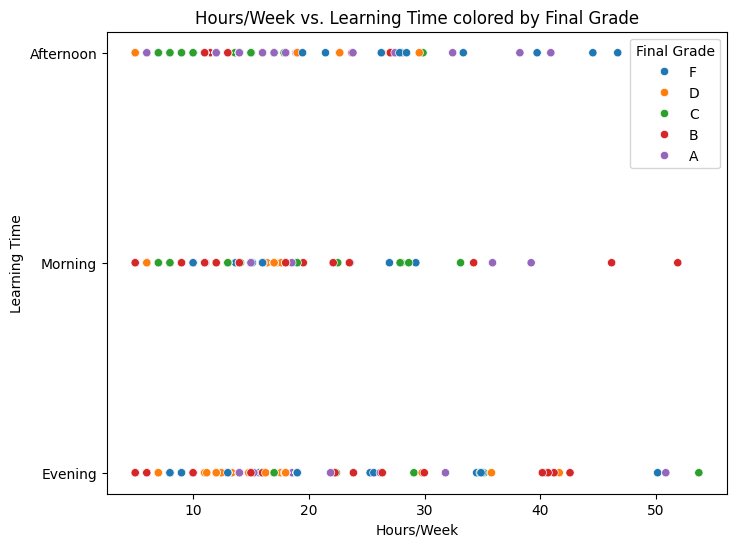

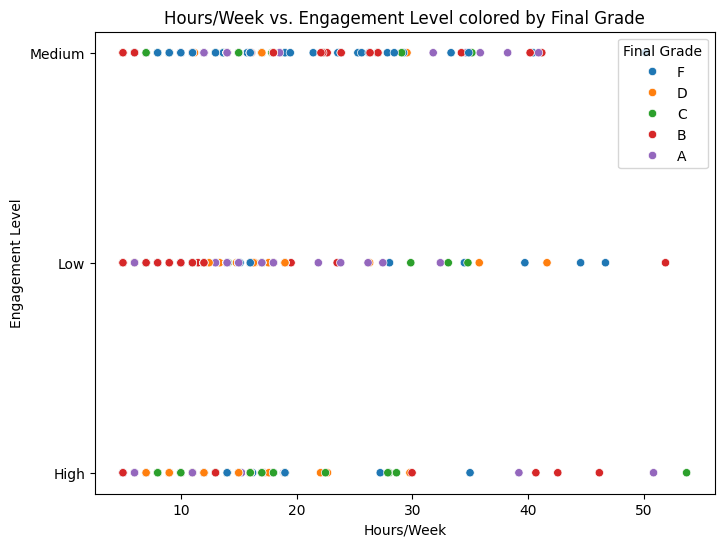

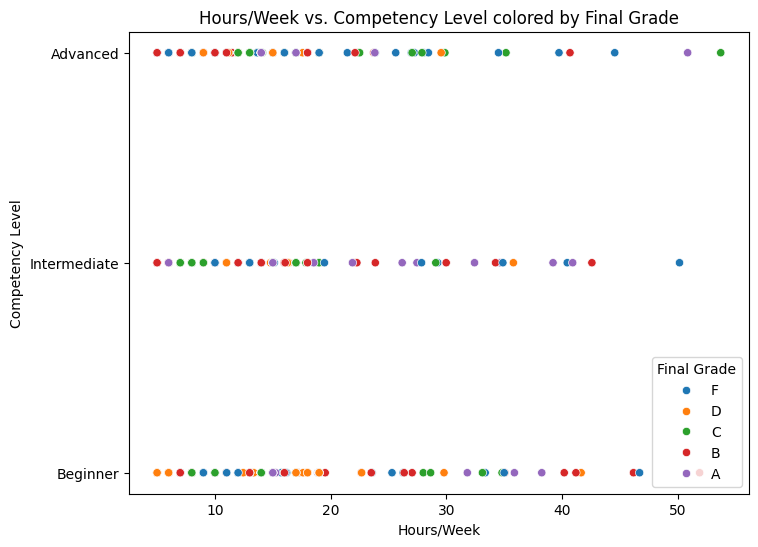

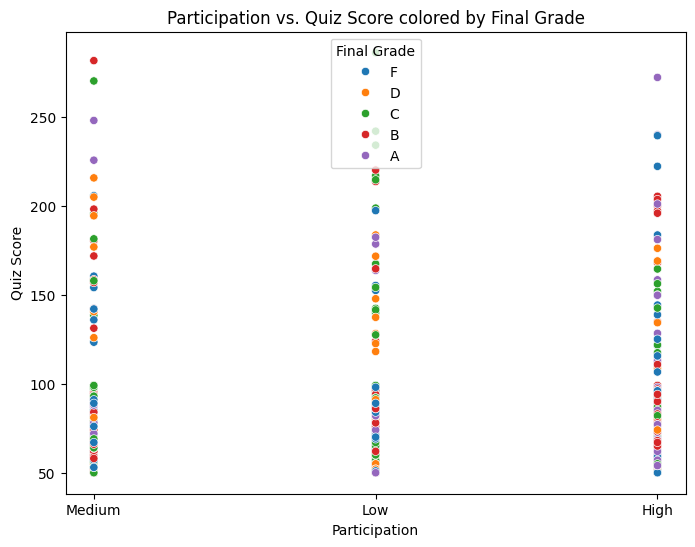

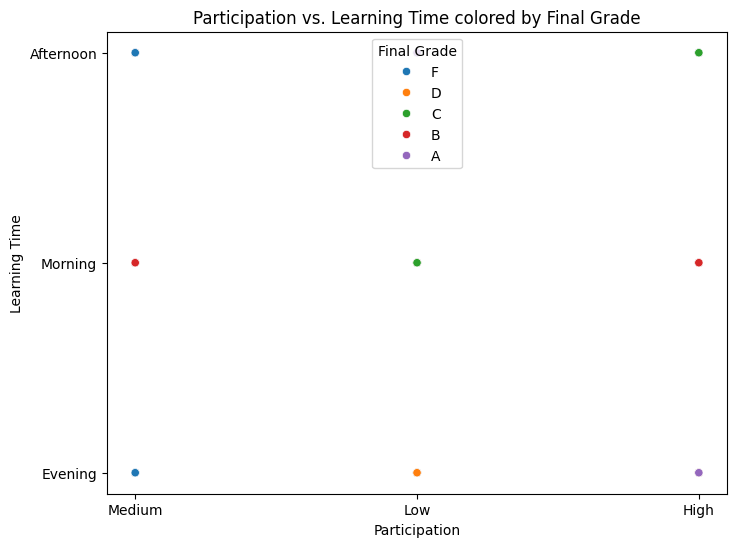

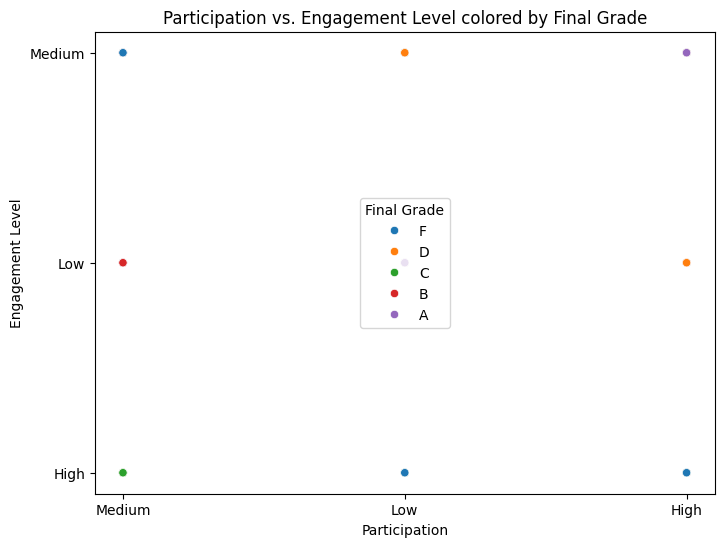

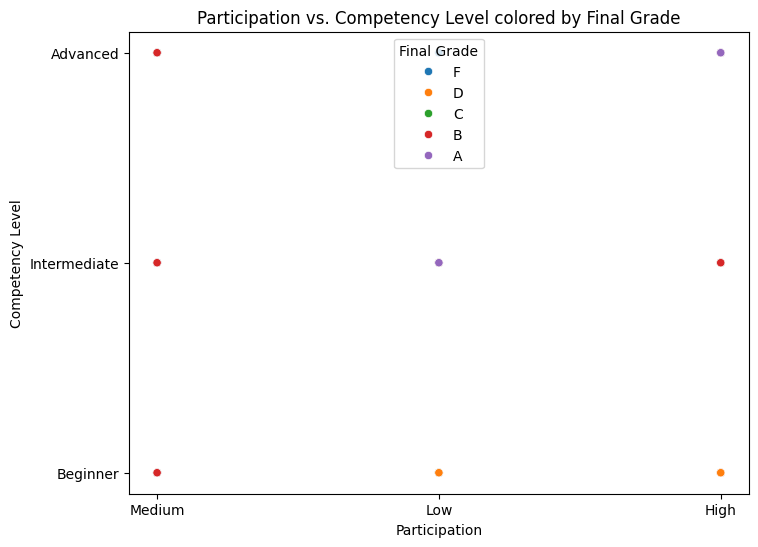

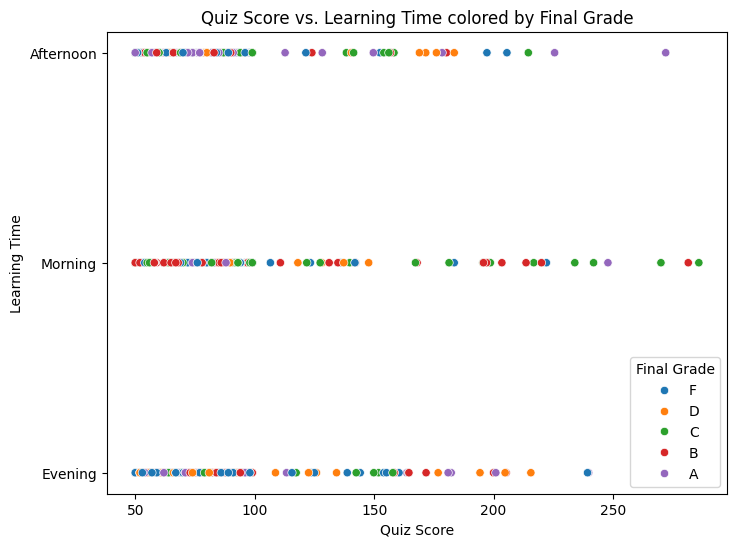

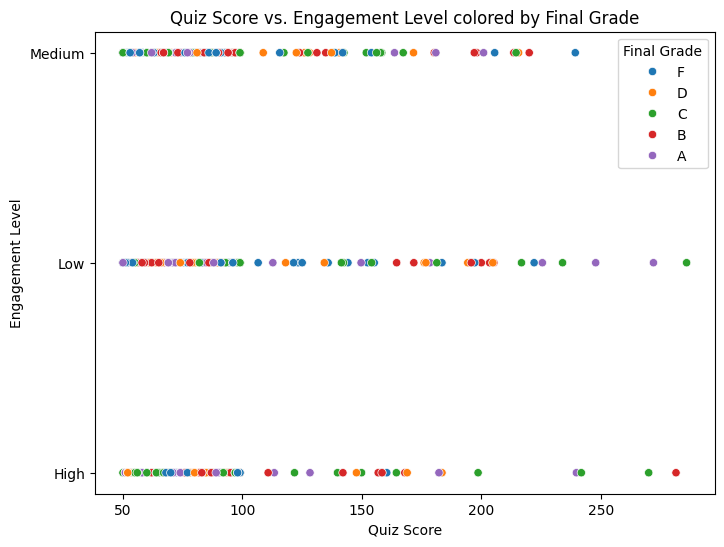

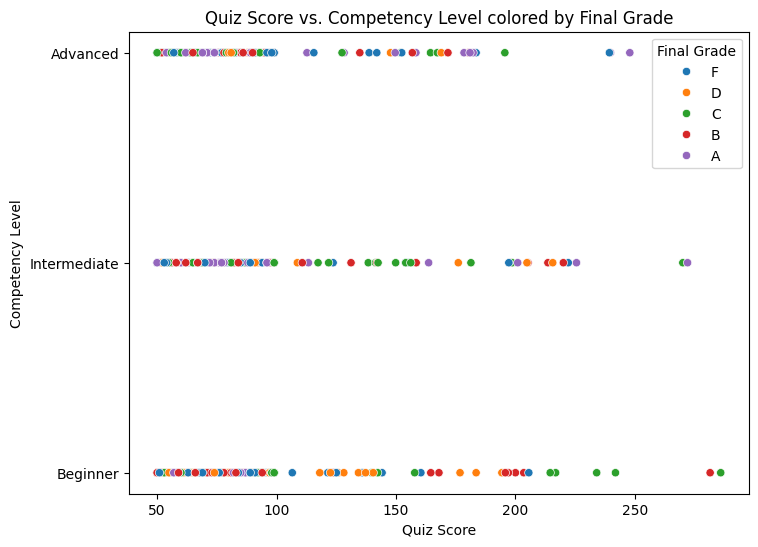

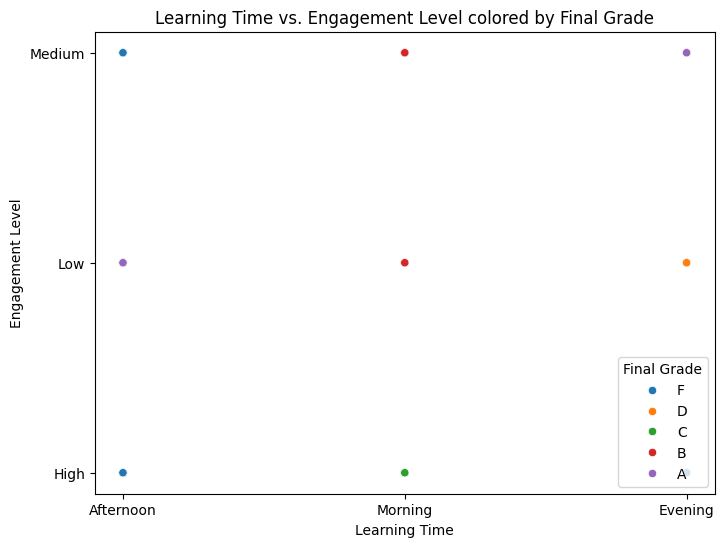

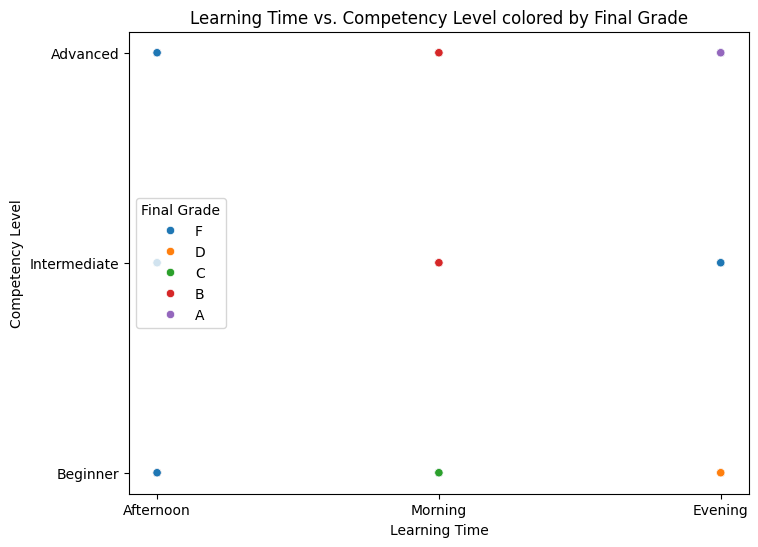

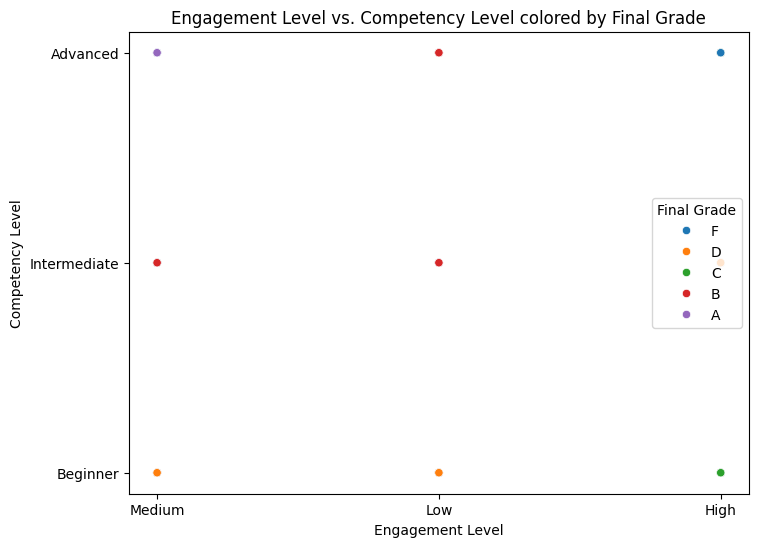

In [142]:
# prompt: tạo cho tôi tất cả biểu đồ scatter plot, so sánh từng trường với nhau

import matplotlib.pyplot as plt
# Assuming 'data' DataFrame is already loaded as in the previous code

# List of features to compare
features_to_compare = ['Hours/Week', 'Participation', 'Quiz Score', 'Learning Time', 'Engagement Level', 'Competency Level']

# Create scatter plots for each pair of features
for i in range(len(features_to_compare)):
  for j in range(i + 1, len(features_to_compare)):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=features_to_compare[i], y=features_to_compare[j], hue='Final Grade', data=data)
    plt.title(f'{features_to_compare[i]} vs. {features_to_compare[j]} colored by Final Grade')
    plt.xlabel(features_to_compare[i])
    plt.ylabel(features_to_compare[j])
    plt.show()


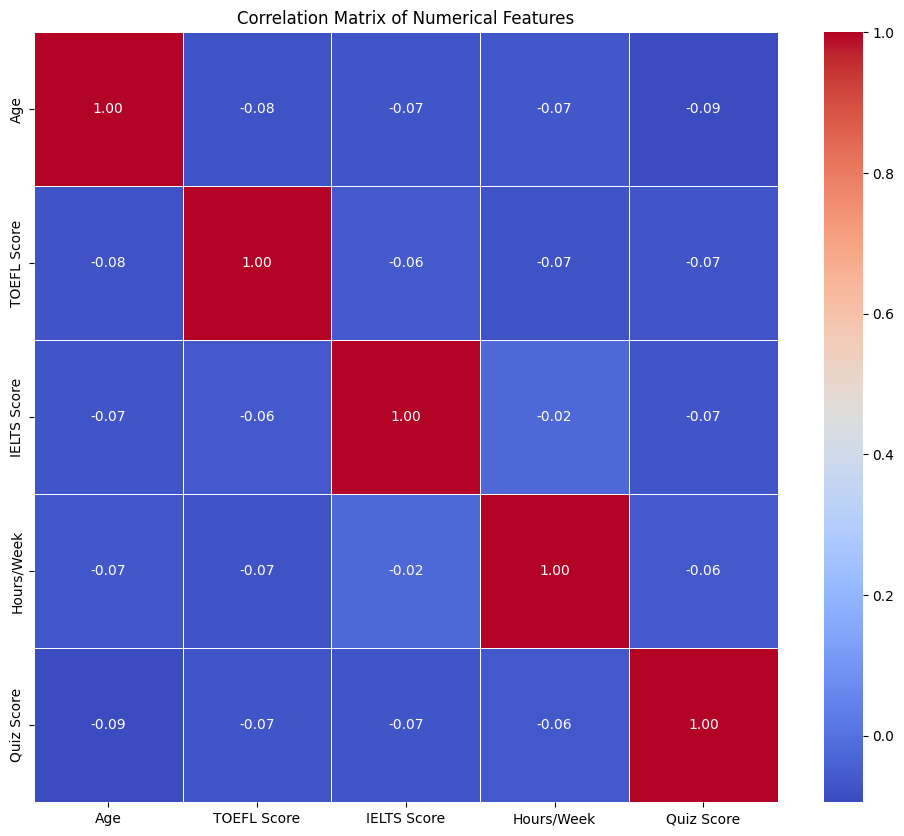

In [143]:
# prompt: vẽ biểu đồ correlation cho từng feature của bộ dataset dùng heatmap và seaborn chỉ thể hiện các feature có số, biểu diễn thông tin dễ đọc

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' DataFrame is already loaded

# Select numerical features
numerical_features = data.select_dtypes(include=np.number)

# Calculate the correlation matrix
correlation_matrix = numerical_features.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()
